In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar
import sympy as sp

## Individual component

For problems 1-6 (for 10 points each), you may approach them analytically first and then use Monte Carlo simulations to confirm the results. You could also explore the answer first with Monte Carlo simulations and then try to understand the results analytically. 

<b>1. </b> In a Monopoly game, players roll two (fair) dice each with the six faces marked from 1 to 6 to determine how many steps to move forward. What’s the probability of the total being 2, 3, 4,…, 11, 12, respectively?


**Solution:**


- Total 2:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+1) &nbsp;&nbsp;&nbsp;&nbsp; Probability = $\frac{1}{36}$ = $0.027778$
- Total 3:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+2, 2+1) &nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{2}{36}$ = $0.055556$
- Total 4:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+3, 2+2, 3+1) &nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{3}{36}$ = $0.083333$
- Total 5:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+4, 2+3, 3+2, 4+1) &nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{4}{36}$ = $0.111111$
- Total 6:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+5, 2+4, 3+3, 4+2, 5+1)&nbsp;&nbsp;&nbsp;&nbsp; Probability = $\frac{5}{36}$ = $0.138889$
- Total 7:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1+6, 2+5, 3+4, 4+3, 5+2, 6+1)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{6}{36}$ = $0.166667$
- Total 8:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2+6, 3+5, 4+4, 5+3, 6+2)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{5}{36}$ = $0.138889$
- Total 9:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3+6, 4+5, 5+4, 6+3)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{4}{36}$ = $0.111111$
- Total 10: &nbsp;&nbsp;&nbsp;&nbsp;(4+6, 5+5, 6+4)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{3}{36}$ = $0.083333$
- Total 11: &nbsp;&nbsp;&nbsp;&nbsp;(5+6, 6+5)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{2}{36}$ = $0.055556$
- Total 12: &nbsp;&nbsp;&nbsp;&nbsp;(6+6)&nbsp;&nbsp;&nbsp;&nbsp;Probability = $\frac{1}{36}$ = $0.027778$

In [5]:
# Number of simulations
n_simulations = 1000000

# Simulate rolling two dice
rolls = np.random.randint(1, 7, size=(n_simulations, 2))
totals = np.sum(rolls, axis=1)

# Calculate probabilities for each total from 2 to 12
probabilities = {total: np.mean(totals == total) for total in range(2, 13)}

probabilities

{2: 0.027901,
 3: 0.055505,
 4: 0.083562,
 5: 0.110966,
 6: 0.139459,
 7: 0.166008,
 8: 0.139171,
 9: 0.11076,
 10: 0.083186,
 11: 0.055655,
 12: 0.027827}

<b>2. </b> What is the probability of at least one of the dice shows a “one”? And by symmetry, this should be the case for “two”, “three”, etc., as well.

**Solution:**


The probability that at least one die shows a "one":

$$1 - \frac{5}{6} \times \frac{5}{6} = \frac{11}{36} \approx 0.30555556 = 30.56\% $$ 

In [6]:
# Calculate the probability that neither die shows a "one"
prob_no_ones = (5/6) * (5/6)

# Therefore, the probability that at least one die shows a "one"
prob_at_least_one_one = 1 - prob_no_ones

prob_at_least_one_one

0.30555555555555547

In [7]:
# using a Monte Carlo simulation
n_simulations = 1000000

rolls = np.random.randint(1, 7, size=(n_simulations, 2))

has_one = np.any(rolls == 1, axis=1)

prob_at_least_one_one = np.mean(has_one)

prob_at_least_one_one

0.304906

<b>3. </b> What is the probability of one die showing a “one” and the other showing a “six”?


**Solution:**

- A. The first die shows a "one" and the second die shows a "six".
$$P_A = \frac{1}{6} \times \frac{1}{6}$$
- B. The first die shows a "six" and the second die shows a "one".
$$P_B = \frac{1}{6} \times \frac{1}{6}$$

Therefore, to find the total probability, we sum the probabilities of these two independent scenarios:

$$P(A \& B) = \frac{1}{6} \times \frac{1}{6} + \frac{1}{6} \times \frac{1}{6} = \frac{1}{18} \approx 0.055556 = 5.56\%$$

In [8]:
n_simulations = 1000000
rolls = np.random.randint(1, 7, size=(n_simulations, 2))

# Check for rolls where one die is a "one" and the other is a "six"
one_and_six = ((rolls[:, 0] == 1) & (rolls[:, 1] == 6)) | ((rolls[:, 0] == 6) & (rolls[:, 1] == 1))

# Calculate the empirical probability
prob_one_and_six_mc = np.mean(one_and_six)

prob_one_and_six_mc

0.055772

<b>4. </b> What is the probability of both dice showing “one”?

**Solution:**


A. dice show "one"
$$P_A = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.0278 = 2.78\%$$

In [9]:
n_simulations = 1000000
rolls = np.random.randint(1, 7, size=(n_simulations, 2))

# Check for both dice showing a "one"
both_ones_present = (rolls[:, 0] == 1) & (rolls[:, 1] == 1)

# Calculate the empirical probability
prob_both_ones_mc = np.mean(both_ones_present)

prob_both_ones_mc

0.027972

<b>5. </b> Verify the law of total probability: Label the two dice A and B. The probability of die A showing a “one” is equal to sum of the joint probabilities of the two dice with die A showing a “one” and all possible outcomes for die B.

**Solution:**

The probability that die A shows a "one".
$$P(A=1)$$

The joint probability that die A shows a "one" and die B shows $i$, where $i$ ranges from 1 to 6 (all possible outcomes for die B).


$P(A=1 \cap B = i)$, for the total probability states that:
 
$$P(A=1 \cap B = 1) + P(A=1 \cap B = 2) + P(A=1 \cap B = 3) + P(A=1 \cap B = 4) + P(A=1 \cap B = 5) + P(A=1 \cap B = 6)$$

Substituting the probabilities:

$$P(A=1) = 6 \times (\frac{1}{6} \times \frac{1}{6}) \approx 0.166667 = 16.67\% $$


In [10]:
p_a_1_direct = 1/6

# Joint probabilities for each outcome of die B when die A shows a "one"
joint_probabilities_sum = 6 * (1/6 * 1/6)

# Verify if the direct probability equals the sum of the joint probabilities
direct_vs_joint = {
    "P(A=1) Direct": p_a_1_direct,
    "Sum of Joint Probabilities": joint_probabilities_sum,
    "Verification": p_a_1_direct == joint_probabilities_sum
}

direct_vs_joint

{'P(A=1) Direct': 0.16666666666666666,
 'Sum of Joint Probabilities': 0.16666666666666666,
 'Verification': True}

In [11]:
n_simulations = 1000000
rolls = np.random.randint(1, 7, size=(n_simulations, 2))

# Calculate the empirical probability of die A showing a "one"
prob_die_A_one = np.mean(rolls[:, 0] == 1)

# Calculate joint probabilities for die A showing a "one" and all outcomes for die B
joint_probs = [np.mean((rolls[:, 0] == 1) & (rolls[:, 1] == outcome)) for outcome in range(1, 7)]

# Sum of the joint probabilities
sum_joint_probs = sum(joint_probs)

prob_die_A_one, sum_joint_probs

(0.166611, 0.166611)

<b>6. </b> After someone rolled the two dice in secret, it is revealed that one of the dice (but not necessarily only one) shows a “six”. What is the chance that the other die shows a “one”?

**Solution:**

- A: The event that one die shows a "one".
- B: The event that at least one die shows a "six".

In this question, we need to find $P(A|B)$, which is the probability if A given B, thus:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

The event $A \cap B$ happens when the first die shows a "one" and the second die shows a "six". or the first die shows a "six" and the second die shows a "one":

$P(A \cap B) = \frac{1}{6} \times \frac{1}{6} + \frac{1}{6} \times \frac{1}{6} = \frac{1}{18}$

The event B, can be calculated using the complement rule (similar to a previous 'at least'problem):

$P(B)$ = 1 - P(No die shows a 'six') = $1 - \frac{5}{6} \times \frac{5}{6} = \frac{11}{36}$


Apply to the formula:
$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{18}}{\frac{11}{36}} \approx 0.181818 = 18.18\%$$


In [12]:
# Calculate P(B)
p_b = 1 - (5/6) * (5/6)

# Calculate P(A ∩ B)
p_a_and_b = (1/6) * (1/6) + (1/6) * (1/6)

# Calculate P(A|B)
p_a_given_b = p_a_and_b / p_b

p_a_given_b

0.18181818181818185

In [18]:
n_simulations = 1000000
rolls = np.random.randint(1, 7, size=(n_simulations, 2))

# Filter rolls where at least one die shows a "six"
at_least_one_six = np.any(rolls == 6, axis=1)
filtered_rolls = rolls[at_least_one_six]

# Calculate the chance that the other die shows a "one" among these filtered rolls
other_die_one = np.any(filtered_rolls == 1, axis=1)

# Calculate the proportion
chance_other_die_one = np.mean(other_die_one)

chance_other_die_one

0.18203606930965385

For problems 1-6, turn in the code, results, and your explanations. 

<b>7. </b>(20 points) Optimal pool size for COVID-19 surveillance, Part 2. For some background, review Part 1 on the Canvas Site (go to “Modules” then “Course Overview Slides”). We want to choose the pool size to minimize the total number of tests needed to identify the people who have the virus. We will use the two-stage pooling strategy: if a pooled sample tests positive then all people in the group will be given an individual test, if a pooled sample tests negative, then all people in the group are considered virus free. We will assume the test is sensitive enough such that if one person in the pool is infected, the pooled sample will test positive. Let $N$ be the total population, p be the probability of a randomly selected person having the virus (i.e. the prevalence of the virus) already determined through random testing, and s be the pool size.

- a)	Express the probability of a pooled sample with pool size s testing positive in terms of $p$ and $s$, assuming the probabilities of individuals in the pool carrying the virus are independent of each other.

**Solutions**

First, we clarify the variables of problem:

- $N$: Total population.

- $p$: the probability of a randomly selected person being infected.

- $s$: Pool size, the number of individuals in each pooled sample.

Assuming the probabilities of individuals in the pool carrying the virus are independent of each other, then the probability of a single individual not carrying the virus is $1-p$ and the probability of all $s$ individuals in the pool do not carry the virus is the product of their individual probabilities of being virus-free(Negtive):

$$P(\text{Negtive}) = (1-p)^s$$

At least one individual in the pool carries the virus would result in the pooled sample testing positive. Therefore, the probability of the pooled sample testing positive is:

$$P(\text{Sample Positive}) = 1 - P(\text{Negtive}) = 1 - (1-p)^s$$

Thus, the probability of a pooled sample with pool size $s$ testing positive (given the independence of individuals' probabilities):
$$P(Positive) = P(\text{Sample Positive}) = 1 - P(\text{Negtive}) = 1 - (1-p)^s$$



- b)	Express the expected value of the total number of tests needed $T$ in terms of $N$, $p$, and $s$.


**Solutions**

First, we clarify the variables of problem:

- Tests needed $T$ 
- Total population $N$
- Rates of the Positive $p$
- Pool size $s$ 

We consider two components of testing:
- The number of pooled tests is the total population divided by the pool size: $\frac{N}{s}$
- Individual Tests for Positive Pools: $1 - (1-p)^s$
- The expected number of individual tests : $N \times (1 - (1-p)^s)$

Therefore the total expected number of tests needs $T$:

$$T = \frac{N}{s} + N \times (1 - (1-p)^s) $$




- c)	Vary $p$ between 0.001 and 0.4, and for each value of $p$, find the value of s that minimizes the expected value of $T$, $E(T)$. To find the optimal $s$, you can either use an optimization function in Matlab or Python or set the derivative of $E(T)$ with respect to s to zero and use a root finding function in Matlab or Python. You could also try a symbolic solver, but it is not required. 

**Solutions**

In [24]:
# Define symbols
p, s = sp.symbols('p s', real=True, positive=True)
N = sp.Symbol('N', real=True, positive=True)

# Function for the expected number of tests E(T)
E_T = N/s + N * (1 - (1 - p)**s)

# Compute the derivative of E(T) with respect to s
dE_T_ds = sp.diff(E_T, s)

dE_T_ds


-N*(1 - p)**s*log(1 - p) - N/s**2

In [61]:
N = 10000
p_values = np.linspace(0.001, 0.4, 100)

# Compute the derivative of E(T) with respect to s for each value of p
def E_T(s, p, N):
    if s < 1:
        return float('inf')
    return N/s + N * (1 - (1 - p)**s)

optimal_s_values = [minimize_scalar(lambda s: E_T(s, p, N)).x for p in p_values]

optimal_s_values[:10]


[32.12707390406631,
 14.610154613404136,
 11.02087690091677,
 9.259359114933876,
 8.165468287781655,
 7.402466727160018,
 6.831694972971822,
 6.38422241177823,
 6.021404000455703,
 5.719673262204866]

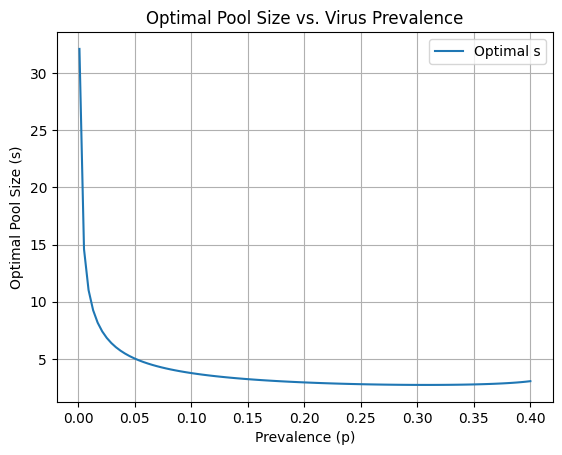

In [62]:
# Plot the optimal s as a function of p
plt.plot(p_values, optimal_s_values, label='Optimal s')
plt.xlabel('Prevalence (p)')
plt.ylabel('Optimal Pool Size (s)')
plt.title('Optimal Pool Size vs. Virus Prevalence')
plt.legend()
plt.grid(True)
plt.show()

## Group component (To be completed in groups of 3 or 4. Members of the same group can turn in the same code and write-up. Please list the names of your group members.) 

<b>10. </b>(10 points) Valentine’s day. Valentine’s day is around the corner. Suppose you would like to set up a flower stand. How many roses would you order? If you order too many, roses are perishable and those that are not sold by Valentine’s day’s end will be lost. If you order too few, you will lose valuable sales opportunities. What factors would you consider, what information would you gather, what approaches (deterministic or probabilistic) would you take towards building a mathematical model to help the decision making? You are only asked to sketch out some ideas; no equations are necessary at this stage. Happy Valentine’s Day, everyone!

**Solution**


#### The number I order will considering on the following factors:

    - Historical Sales Data 
    - Population in this area (rates of the age, gender, etc.. )
    - The shelf life of roses and the rate of spoilage
    - Competitor Analysis: Pricing, promotions, and product offerings from nearby competitors.


#### How to Building the Model:

Deterministic Method Model
- A deterministic model could use fixed inputs such as historical sales data and fixed costs, to predict a safe number of roses to order.
    - minimum number of roses that need to be sold to cover costs
    - Using historical data to predict sales, adjusting for any known factors affecting this year's demand.

Probabilistic Method Model
- A probabilistic model acknowledges uncertainty and uses probability distributions to estimate outcomes. This might involve:
    - Bayesian Models
    - Monte Carlo Simulations Models